 #  A Whale off the Port(folio)
 Steve Stark - FinTech MIA
 6/27/21
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import csv
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path(r"whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(ascending=True, inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path(r"algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending=True, inplace=True)         
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().mean()*100

Algo 1    0.0
Algo 2    0.0
dtype: float64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path(r"sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df['Close'].dtype

dtype('O')

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtype

<ipython-input-10-4ca96341af32>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


dtype('float64')

In [11]:
# Calculate Daily Returns
sp500_daily_df = sp500_df.pct_change()
sp500_daily_df['Close'] = sp500_daily_df['Close'].astype('float')
sp500_daily_df['Close'].dtype
sp500_daily_df.head(20)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195


In [12]:
# Drop nulls
sp500_daily_df.dropna(inplace=True)
sp500_daily_df.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_df.rename(columns={"Close":"S&P 500"}, inplace=True)
sp500_daily_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df = pd.concat([whale_df,algo_df,sp500_daily_df], axis='columns', join='inner')
portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the Daily Returns.

##### A small matrix and bar plot of the average daily returns of portfolios in this report will be useful for comparison and analysis. 

In [15]:
# This wasn't part of the assignment, but I wanted to see it for my analysis. 
portfolio_avg_daily_returns = portfolio_df.mean()*100
portfolio_avg_daily_returns.sort_values(ascending=True, inplace=True)
portfolio_avg_daily_returns

PAULSON & CO.INC.             -0.021394
TIGER GLOBAL MANAGEMENT LLC   -0.008308
SOROS FUND MANAGEMENT LLC      0.017727
Algo 2                         0.026347
S&P 500                        0.034931
BERKSHIRE HATHAWAY INC         0.050603
Algo 1                         0.066179
dtype: float64

<AxesSubplot:title={'center':'Average Daily Returns - Combined Portfolios'}>

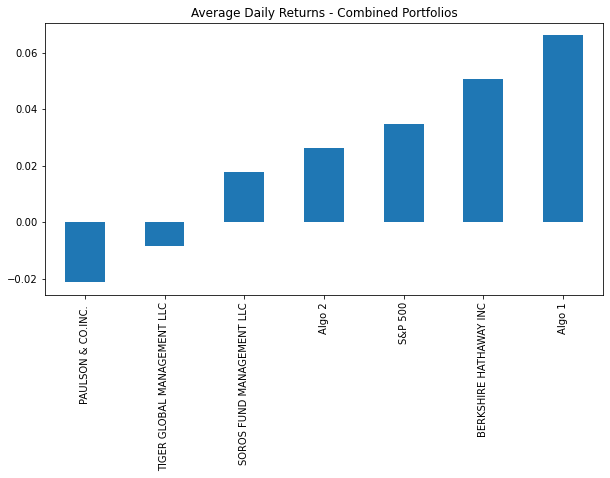

In [16]:
# Plot average daily returns of all portfolios in a bar plot.
portfolio_avg_daily_returns.plot.bar(figsize=(10,5), title='Average Daily Returns - Combined Portfolios')

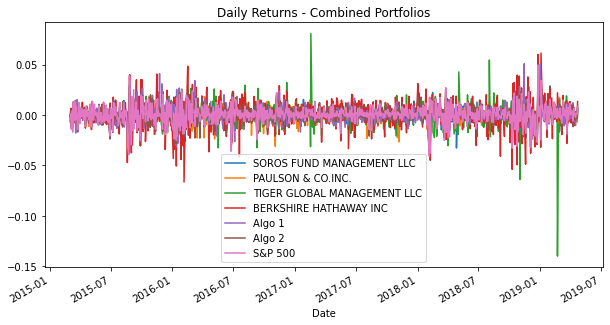

In [17]:
# Plot daily returns of all portfolios
portfolio_plot = portfolio_df.plot(figsize=(10,5), title='Daily Returns - Combined Portfolios')

#### Calculate and Plot Cumulative Returns.

<AxesSubplot:title={'center':'Cumulative Returns - Combined Portfolios'}, xlabel='Date'>

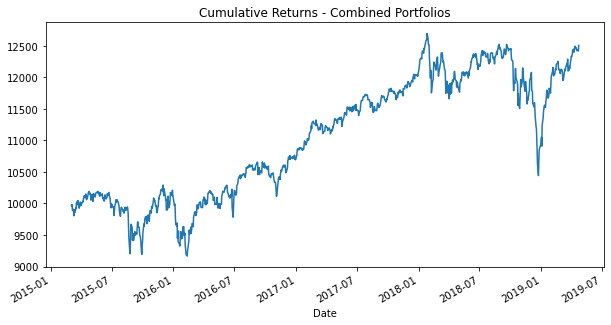

In [18]:
# Calculate cumulative returns of all portfolios
weights = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.30]
portfolio_returns = portfolio_df.dot(weights)
portfolio_returns.head()
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

# Plot cumulative returns
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot(figsize=(10,5), title='Cumulative Returns - Combined Portfolios')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a Box Plot for Each Portfolio


<AxesSubplot:>

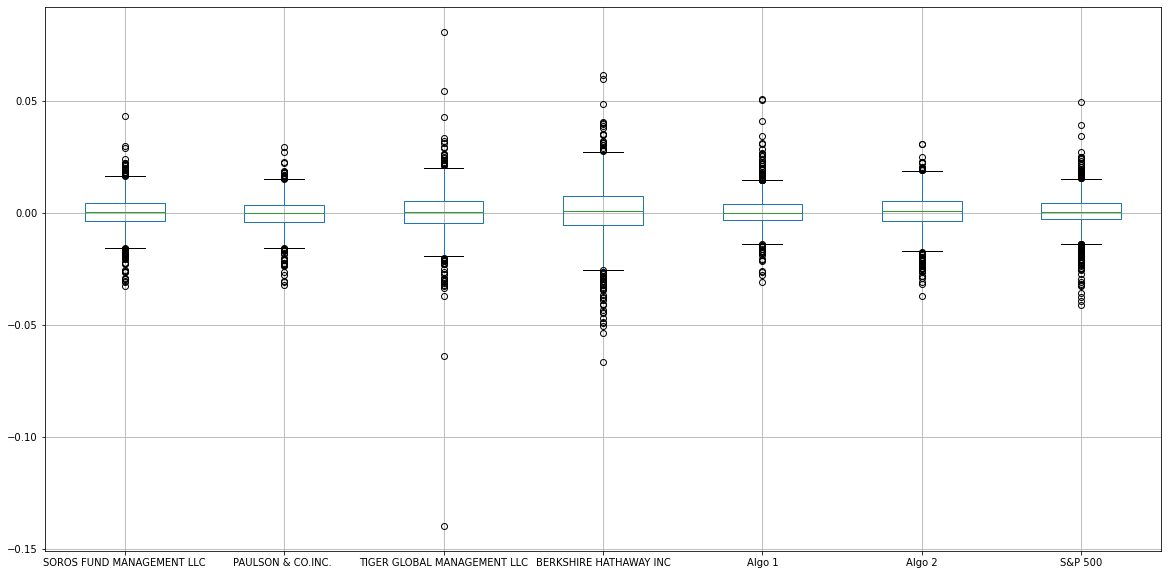

In [19]:
# Box plot to visually show risk

portfolio_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios

portfolio_std = portfolio_df.std()
sort_portfolio_std = portfolio_std.sort_values(ascending=True)
sort_portfolio_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine Which Portfolios are Riskier than the S&P 500

In [21]:
# Calculate the daily standard deviation of S&P 500
sp500_std = round(portfolio_df["S&P 500"].std(), 6)
#sp500_std = sp500_daily_df.std()
sp500_std

0.008554

In [22]:
# Determine which portfolios are riskier than the S&P 500
sort_portfolio_std > sp500_std

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

##### ANALYSIS: The two portfolios with standard deviations greater than that of the S&P 500 are Tiger Global Management LLC and Berkshire Hathaway Inc. Thus, they are riskier than the S&P 500. 

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = portfolio_df.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and Plot Rolling `std` for All Portfolios with 21-day Window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

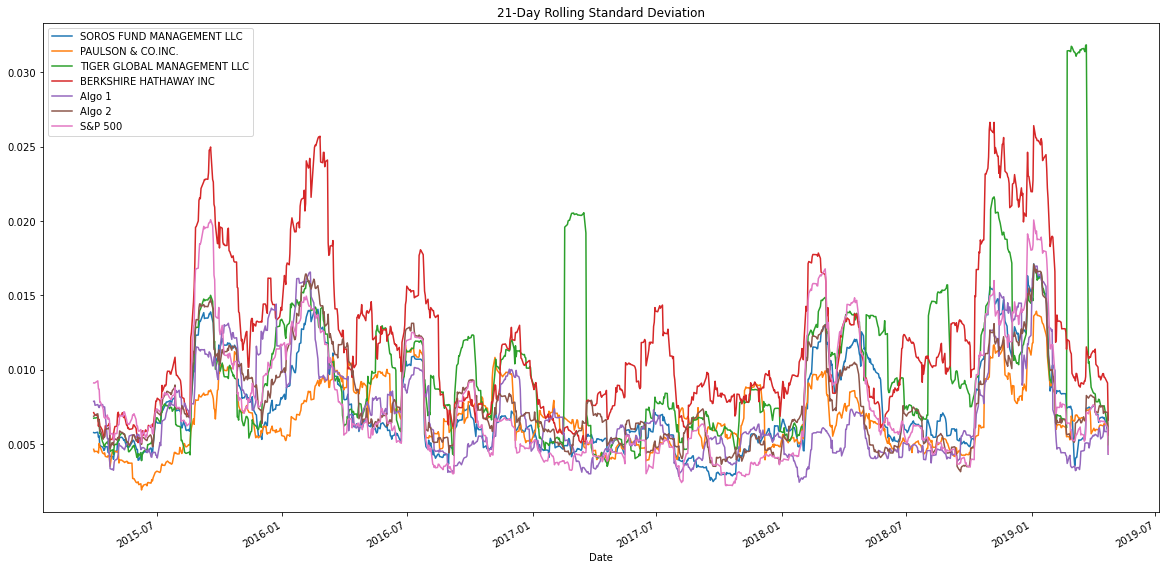

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_21day_std = portfolio_df.rolling(window=21).std()

# Plot the rolling standard deviation
portfolio_21day_std.plot(figsize=(20,10), title="21-Day Rolling Standard Deviation")

### Calculate and Plot the Correlation

In [25]:
# Calculate the correlation
correlation = portfolio_df.corr()

# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a Chosen Portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta: Soros Fund Management LLC and S&P 500'}, xlabel='Date'>

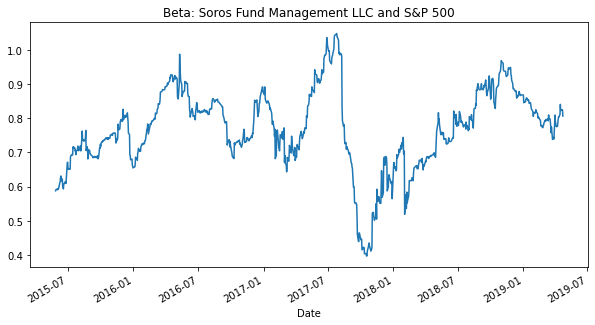

In [26]:
# Calculate covariance of a single portfolio

#soros_fund = portfolio_df.loc[:,"SOROS FUND MANAGEMENT LLC"]
#soros_fund

soros_covariance = (portfolio_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(portfolio_df['S&P 500']))
soros_covariance

# Calculate variance of S&P 500

sp500_variance = portfolio_df['S&P 500'].rolling(window=60).var()
sp500_variance

# Computing beta

soros_beta = soros_covariance / sp500_variance
soros_beta

# Plot beta trend
soros_beta.plot(figsize=(10,5), title='Beta: Soros Fund Management LLC and S&P 500')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially-weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

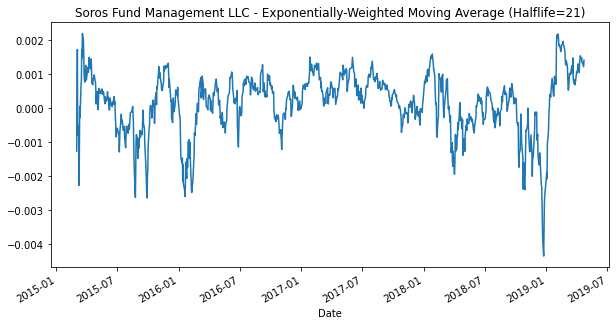

In [27]:
# Use `ewm` to calculate the rolling window

soros_df = portfolio_df.iloc[:, 0]
# soros_df - to check the data

soros_ewm = soros_df.ewm(halflife=21).mean()
soros_ewm_plot = soros_ewm.plot(figsize=(10,5), title="Soros Fund Management LLC - Exponentially-Weighted Moving Average (Halflife=21)")

---

# Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the Daily Returns, Calculate and Visualize the Sharpe Ratios Using a Bar Plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratio = (portfolio_df.mean() * 252) / annualized_std      # (portfolio_df.std() * np.sqrt(252))
sharpe_ratio.sort_values(ascending=True, inplace=True)
sharpe_ratio.head(8)

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios - Combined Portfolios'}>

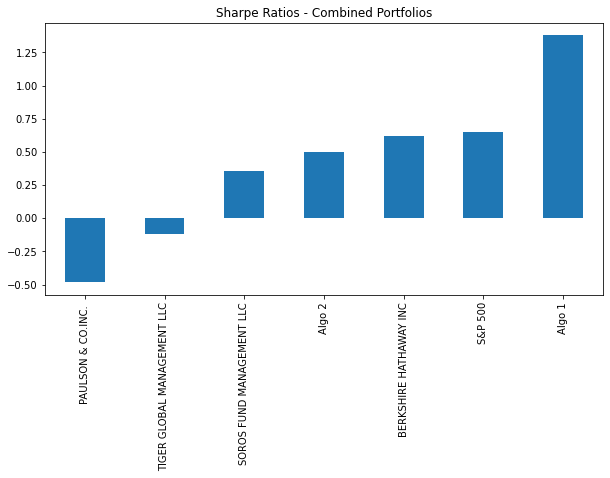

In [29]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot.bar(figsize=(10,5), title='Sharpe Ratios - Combined Portfolios')

### Determine Whether the Algorithmic Strategies Outperform Both the Market (S&P 500) and the Whales Portfolios.

Algo 1 outperformed everyone. Algo 1 boasts the highest average daily return (0.066179% per day), and the second-lowest risk based on standard deviation (0.007620). It also records the lowest correlation to the S&P 500, which is a strong indicator of favorable diversification within the portfolio. Additionally, the Sharpe Ratio for Algo 1 is not only the highest, but also makes it the only portfolio in the group with a Sharpe Ratio that beats the S&P 500, and the only one exceeding 1.0, coming in at 1.378648. This indicates a favorable ratio of risk to reward available in this investment. 
Algo 2 is not so high a performer as Algo 1. As far as risk goes, Algo 2 comes in with a nearly identical standard deviation to that of the S&P 500. Algo 2 has a correlation of 0.858764 to the S&P 500, suggesting it is considerably less diverse than Algo 1. The average daily returns of Algo 2 are 0.026347%, which puts it in the middle of the pack and lagging slightly behind the market. The Sharpe Ratio for Algo 2 is 0.501364, again behind the market. That said, Algo 2's performance was sufficient enough to still outperform all of the whales portfolios other than Berkshire Hathaway Inc. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 Custom Stocks with at Least 1 Year's Worth of Historic Prices and Create a DataFrame of the Closing Prices and Dates for Each Stock.

For this demo solution, we fetch data from three companies listed in the S&P 500 index.

* `MCD` - [McDonald's Corporation](https://en.wikipedia.org/wiki/McDonalds)

* `XOM` - [ExxonMobil Corp.](https://en.wikipedia.org/wiki/ExxonMobil)

* `PM` - [Philip Morris International Inc.](https://en.wikipedia.org/wiki/Philip_Morris_International)

In [30]:
# Reading data from 1st stock

mcd_path = Path("mcd_pathfile.csv")
mcd_df = pd.read_csv(mcd_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
mcd_df.rename(columns={'Close': 'MCD'}, inplace=True)
mcd_df.sort_index(ascending=True, inplace=True)
mcd_df

,MCD
Date,
2015-03-03,99.74
2015-03-04,100.25
2015-03-05,99.11
2015-03-06,97.13
2015-03-09,97.71
...,...
2019-04-15,191.85
2019-04-16,191.70
2019-04-17,191.61


In [31]:
# Reading data from 2nd stock

xom_path = Path("xom_pathfile.csv")
xom_df = pd.read_csv(xom_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
xom_df.rename(columns={'Close': 'XOM'}, inplace=True)
xom_df.sort_index(ascending=True, inplace=True)
xom_df

,XOM
Date,
2015-03-03,87.62
2015-03-04,87.18
2015-03-05,86.74
2015-03-06,85.63
2015-03-09,85.16
...,...
2019-04-15,80.65
2019-04-16,81.20
2019-04-17,81.43


In [32]:
# Reading data from 3rd stock

pm_path = Path("pm_pathfile.csv")
pm_df = pd.read_csv(pm_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
pm_df.rename(columns={'Close': 'PM'}, inplace=True)
pm_df.sort_index(ascending=True, inplace=True)
pm_df

,PM
Date,
2015-03-03,82.70
2015-03-04,82.17
2015-03-05,81.71
2015-03-06,80.05
2015-03-09,80.45
...,...
2019-04-15,86.19
2019-04-16,86.21
2019-04-17,85.48


In [33]:
# Combine all stocks in a single DataFrame

my_portfolio_df = pd.concat([mcd_df, xom_df, pm_df], axis="columns", join="inner")
my_portfolio_df

,MCD,XOM,PM
Date,,,
2015-03-03,99.74,87.62,82.70
2015-03-04,100.25,87.18,82.17
2015-03-05,99.11,86.74,81.71
2015-03-06,97.13,85.63,80.05
2015-03-09,97.71,85.16,80.45
...,...,...,...
2019-04-15,191.85,80.65,86.19
2019-04-16,191.70,81.20,86.21
2019-04-17,191.61,81.43,85.48


In [34]:
# Reset Date Index
# Reorganize portfolio data by having a column per symbol

##### These steps were dealth with previously:
- Reset Date Index
    - When this data was imported, the date index had already been corrected by following the demonstration in class:
        - Use GOOGLEFINANCE in Google Sheets to call up stock data.
        - Copy stock data, paste values into new sheet.
        - Download sheet and open in Excel.
        - Select all date data in first column, right click, select 'Format Cells'.
        - Under 'Number Tab', select 'Category: Date' and make sure 'Type' is in mm/dd/yyyy format.
        - Save csv and read it in Python. 

- Reorganize portfolio data by having a column per symbol
    - My data was already organized in this manner. 

In [35]:
# Calculate daily returns

my_portfolio_daily = my_portfolio_df.pct_change()

# Drop NAs

my_portfolio_daily.isnull().sum()
my_portfolio_daily.dropna(inplace=True)

# Display sample data
my_portfolio_daily


,MCD,XOM,PM
Date,,,
2015-03-04,0.005113,-0.005022,-0.006409
2015-03-05,-0.011372,-0.005047,-0.005598
2015-03-06,-0.019978,-0.012797,-0.020316
2015-03-09,0.005971,-0.005489,0.004997
2015-03-10,-0.014533,-0.010568,-0.014916
...,...,...,...
2019-04-15,0.001305,-0.003337,0.004897
2019-04-16,-0.000782,0.006820,0.000232
2019-04-17,-0.000469,0.002833,-0.008468


##### A small matrix and bar plot of the average daily returns of portfolios in this report will be useful for comparison and analysis. 

In [36]:
# This wasn't part of the assignment, but I wanted to see it for my analysis. 
my_portfolio_avg_daily_returns = my_portfolio_daily.mean()*100
my_portfolio_avg_daily_returns.sort_values(ascending=True, inplace=True)
my_portfolio_avg_daily_returns

XOM    0.001930
PM     0.010435
MCD    0.069559
dtype: float64

<AxesSubplot:title={'center':'Average Daily Returns - My Portfolio'}>

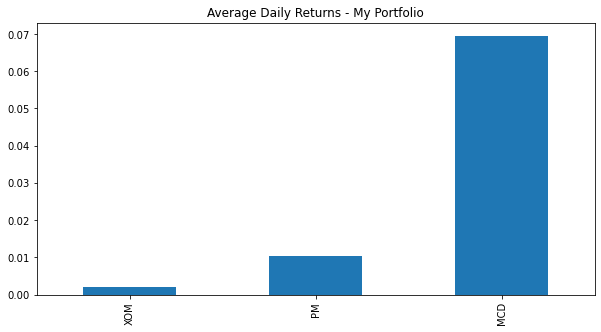

In [37]:
# Plot average daily returns of all portfolios in a bar plot.
my_portfolio_avg_daily_returns.plot.bar(figsize=(10,5), title='Average Daily Returns - My Portfolio')

## Calculate the Weighted Returns for the Portfolio Assuming an Equal Number of Shares for Each Stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_portfolio_daily.dot(weights)
my_portfolio_returns.head()
my_cumulative_returns = (1 + my_portfolio_returns).cumprod()

# Display sample data
my_cumulative_returns.head()

Date
2015-03-04    0.997894
2015-03-05    0.990571
2015-03-06    0.973041
2015-03-09    0.974818
2015-03-10    0.961815
dtype: float64

<AxesSubplot:title={'center':'Cumulative Returns of 3-Stock Portfolio (MCD, XOM & PM)'}, xlabel='Date'>

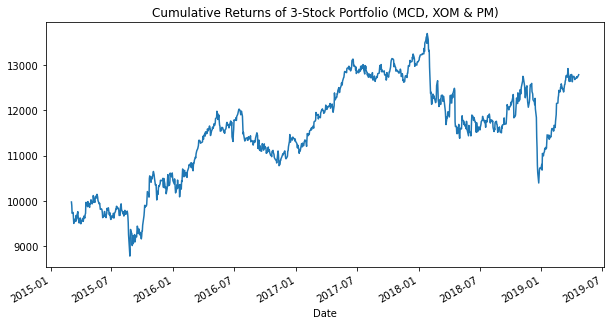

In [39]:
# Plot cumulative returns
my_initial_investment = 10000
my_cumulative_profit = my_initial_investment * my_cumulative_returns
my_cumulative_profit.plot(figsize=(10,5), title='Cumulative Returns of 3-Stock Portfolio (MCD, XOM & PM)')

## Join Your Portfolio Returns to the DataFrame that Contains All of the Portfolio Returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame

aggregate_df = pd.concat([my_portfolio_daily, portfolio_df], axis='columns', join='inner')
aggregate_df.head()


,MCD,XOM,PM,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,
2015-03-04,0.005113,-0.005022,-0.006409,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,-0.011372,-0.005047,-0.005598,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.019978,-0.012797,-0.020316,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.005971,-0.005489,0.004997,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.014533,-0.010568,-0.014916,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
aggregate_df.dropna()

,MCD,XOM,PM,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,
2015-03-04,0.005113,-0.005022,-0.006409,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,-0.011372,-0.005047,-0.005598,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.019978,-0.012797,-0.020316,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.005971,-0.005489,0.004997,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.014533,-0.010568,-0.014916,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,0.001305,-0.003337,0.004897,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629
2019-04-16,-0.000782,0.006820,0.000232,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.000469,0.002833,-0.008468,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274


## Re-run the Risk Analysis with Your Portfolio to See How It Compares to the Others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`

aggregate_annualized_std = aggregate_df.std() * np.sqrt(252)
aggregate_annualized_std.sort_values(inplace=True)
aggregate_annualized_std

PAULSON & CO.INC.              0.111556
Algo 1                         0.121058
SOROS FUND MANAGEMENT LLC      0.125406
Algo 2                         0.132475
S&P 500                        0.135831
MCD                            0.169504
TIGER GLOBAL MANAGEMENT LLC    0.173072
XOM                            0.191214
BERKSHIRE HATHAWAY INC         0.205148
PM                             0.206622
dtype: float64

### Calculate and Plot Rolling `std` with 21-day Window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

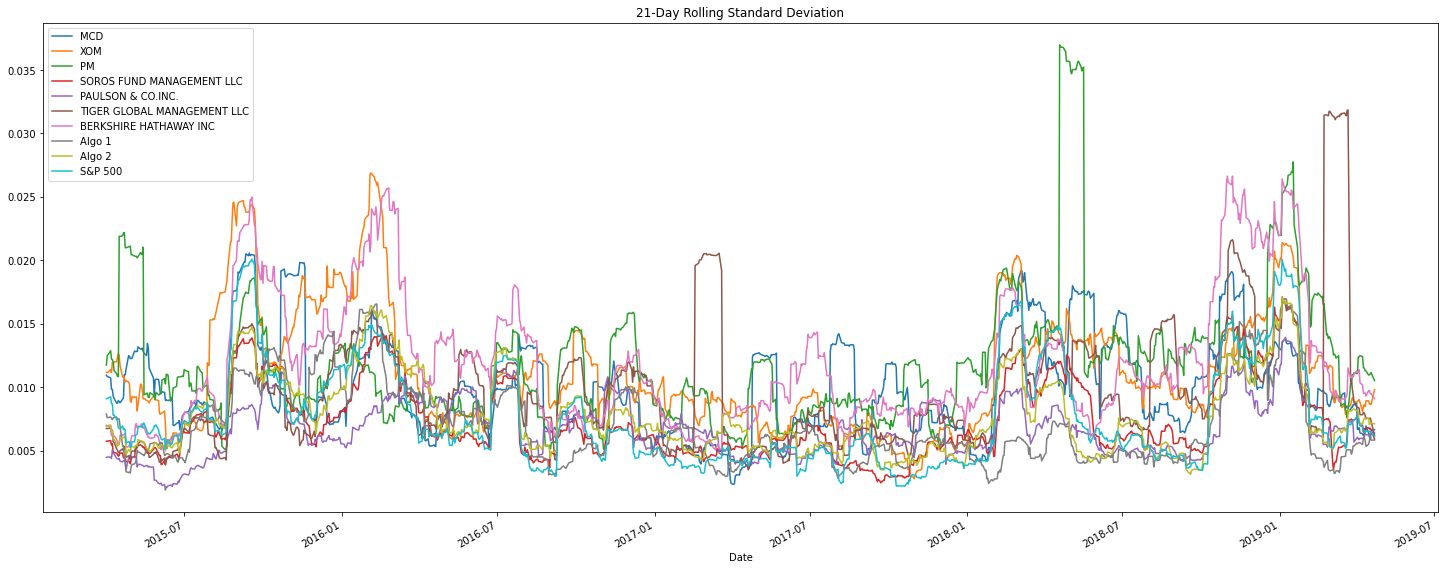

In [43]:
# Calculate rolling standard deviation

aggregate_21day_std = aggregate_df.rolling(window=21).std()
#portfolio_21day_std.head(23)     ## to check the data output

# Plot rolling standard deviation
aggregate_21day_std.plot(figsize=(25,10), title="21-Day Rolling Standard Deviation")


### Calculate and Plot the Correlation

<AxesSubplot:>

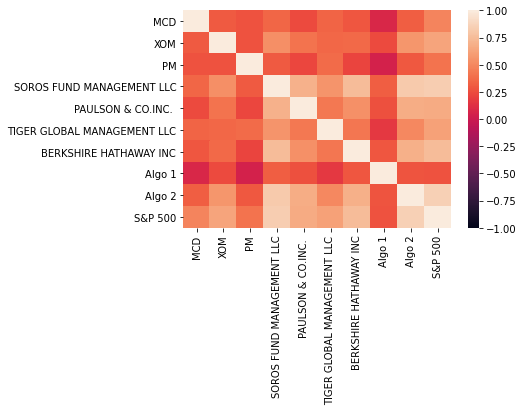

In [44]:
# Calculate and plot the correlation
aggregate_correlation = aggregate_df.corr()

# Display the correlation matrix
#aggregate_correlation ## to check data output

# Use the `heatmap` function from the seaborn library to visualize correlations
import seaborn as sns
sns.heatmap(aggregate_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta of 3-Stock Portfolio (MCD, XOM, PM) Compared to S&P 500'}, xlabel='Date'>

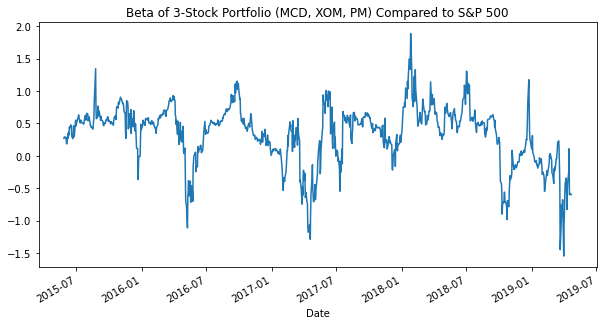

In [45]:
# Calculate and plot Beta - I am understanding the instructions to be to run the beta on my 3-stock portfolio juxtaposed with the S&P 500. 

my_portfolio_covariance = (my_cumulative_returns.rolling(window=60).cov(portfolio_df['S&P 500']))
my_portfolio_covariance

# Computing beta

my_portfolio_beta = my_portfolio_covariance / sp500_variance # sp500_variance previously calculated
my_portfolio_beta

# Plot beta trend
my_portfolio_beta.plot(figsize=(10,5), title='Beta of 3-Stock Portfolio (MCD, XOM, PM) Compared to S&P 500')


### Using the Daily Returns, Calculate and Visualize the Sharpe Ratios Using a Bar Plot

In [46]:
# Calculate Annualzied Sharpe Ratios

aggregate_sharpe_ratio = (aggregate_df.mean() * 252) / aggregate_annualized_std # (portfolio_df.std() * np.sqrt(252))
aggregate_sharpe_ratio.sort_values(ascending=True)

PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
XOM                            0.025437
PM                             0.127263
SOROS FUND MANAGEMENT LLC      0.345506
Algo 2                         0.486307
BERKSHIRE HATHAWAY INC         0.614872
S&P 500                        0.641630
MCD                            1.034131
Algo 1                         1.374206
dtype: float64

<AxesSubplot:title={'center':'Aggregated Portfolio - Sharpe Ratios'}>

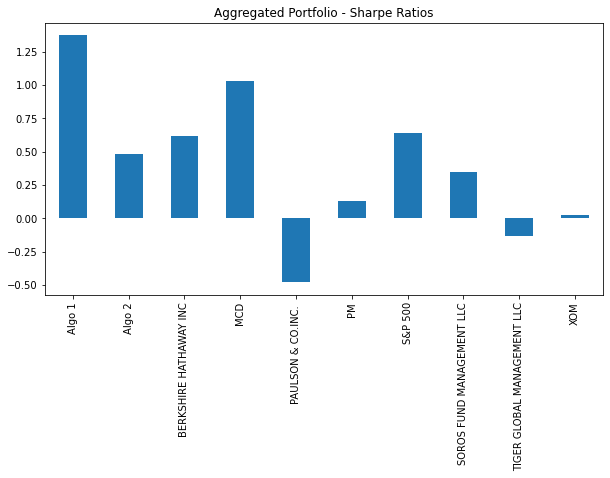

In [47]:
# Visualize the sharpe ratios as a bar plot

aggregate_sharpe_ratio.plot.bar(figsize=(10,5), title='Aggregated Portfolio - Sharpe Ratios')


### How does your portfolio do?

Based on the cumulative returns of my portfolio, I can say it saw an approximate 25% increase over the timeframe of this report. However, individually the only one of my 3 stock picks that turned out to be a robust performer was McDonald's Corporation. McDonald's becomes the second holding in this report with a Sharpe ratio exceeding 1.0, indicating a good risk value. MCD also earns some bragging rights as the investment with the top average daily return (0.069559%) out of the selection within this report, during the time of the report. The annualized standard deviation for MCD was only slightly higher than that of the market, another indication that it is a good value for the risk. REgrettably, my other two choices did not fair so well. Both XOM and PM show greater volatility, with Sharpe ratios barely over the 0.0 point. This is further suggested by these stocks reporting two of the three highest standard deviations in the field. Additionally, although their average daily returns are in the black, they are at the lower end of the range in this report.  My portfolio would have done great if it had been 100% McDonalds! In the overall report, Algo 1 was the winner as the best investment over the designated period. 